In [0]:
import numpy as np
import pandas as pd
from pyspark.sql.functions import regexp_replace

<hr>

## **Tratamento de dados**

In [0]:
df = spark.read.csv("/FileStore/tables/retail.csv", header=True, sep=';')
df = df.withColumn('unit_price', regexp_replace('unit_price', ',', '.'))
df = df.toPandas()

In [0]:
df["quantity"] = df["quantity"].astype(int)
df['unit_price'] = df['unit_price'].astype(float)
df['lucro'] = df['unit_price'] * df["quantity"]

df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,lucro
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850,United Kingdom,20.34


In [0]:
df2 = df\
    .assign(datetime = lambda x: pd.to_datetime(x['invoice_date']))\
    .assign(date = lambda x: x['datetime'].dt.date)\
    .assign(date = lambda x: pd.to_datetime(x['date']))\
    .assign(hora = lambda x: x['datetime'].dt.hour)\
    .assign(mes = lambda x: x['datetime'].dt.month)\
    .assign(ano = lambda x: x['datetime'].dt.year)\
    .assign(dia_semana = lambda x: x['datetime'].dt.weekday)
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,lucro,datetime,date,hora,mes,ano,dia_semana
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850,United Kingdom,15.30,2010-01-12 08:26:00,2010-01-12,8,1,2010,1
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00,2010-01-12,8,1,2010,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850,United Kingdom,22.00,2010-01-12 08:26:00,2010-01-12,8,1,2010,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00,2010-01-12,8,1,2010,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00,2010-01-12,8,1,2010,1


<hr>

<hr>

## **Geração de gráficos**

In [0]:
import matplotlib.pyplot as plt

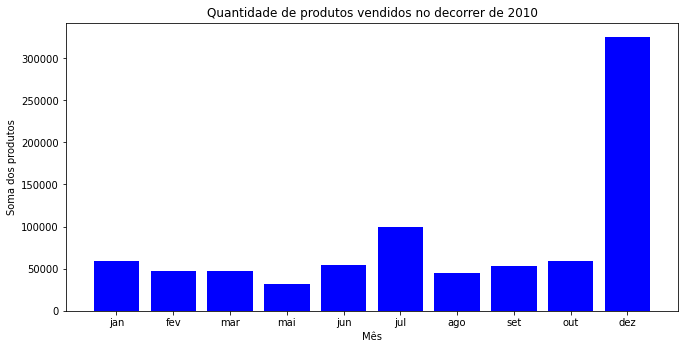

In [0]:
meses = {1: 'jan', 2: 'fev', 3: 'mar', 4: 'abr', 5: 'mai', 6: 'jun', 7: 'jul', 8: 'ago', 9: 'set', 10: 'out', 11: 'nov', 12: 'dez'}

lucro_ano_2010 = df2[(df2['lucro'] >= 0) & (df2['ano'] == 2010)]\
    .groupby(by='mes')\
    .agg(soma=('lucro', 'sum'))\
    .sort_values('mes', ascending=True).round(2)\
    .reset_index()

lucro_ano_2010['mes'] = lucro_ano_2010['mes'].replace(meses)
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1.7, 1])
    
eixo.bar(lucro_ano_2010.mes, lucro_ano_2010['soma'], color='blue')
    
plt.xlabel('Mês')
plt.ylabel('Soma dos produtos')
plt.title('Quantidade de produtos vendidos no decorrer de 2010')

plt.show()

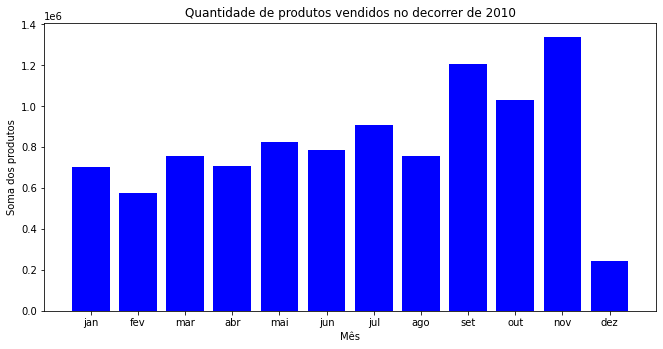

In [0]:
meses = {1: 'jan', 2: 'fev', 3: 'mar', 4: 'abr', 5: 'mai', 6: 'jun', 7: 'jul', 8: 'ago', 9: 'set', 10: 'out', 11: 'nov', 12: 'dez'}

lucro_ano_2010 = df2[(df2['lucro'] >= 0) & (df2['ano'] == 2011)]\
    .groupby(by='mes')\
    .agg(soma=('lucro', 'sum'))\
    .sort_values('mes', ascending=True).round(2)\
    .reset_index()

lucro_ano_2010['mes'] = lucro_ano_2010['mes'].replace(meses)
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1.7, 1])
    
eixo.bar(lucro_ano_2010.mes, lucro_ano_2010['soma'], color='blue')
    
plt.xlabel('Mês')
plt.ylabel('Soma dos produtos')
plt.title('Quantidade de produtos vendidos no decorrer de 2010')

plt.show()

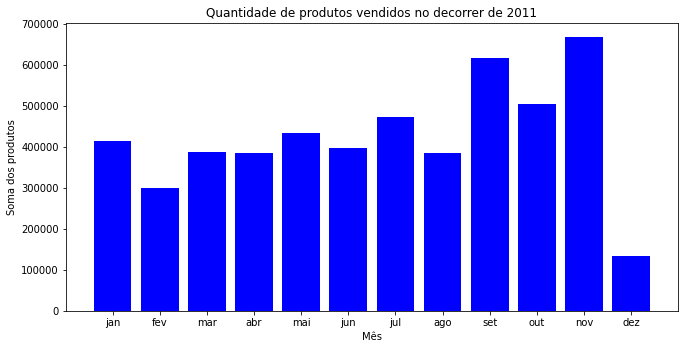

In [0]:
lucro_ano_2011 = df2[(df2['lucro'] >= 0) & (df2['ano'] == 2011)]\
    .groupby(by='mes')\
    .agg(soma=('quantity', 'sum'))\
    .sort_values('mes', ascending=True).round(2)\
    .reset_index()

lucro_ano_2011['mes'] = lucro_ano_2011['mes'].replace(meses)

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1.7, 1])
    
eixo.bar(lucro_ano_2011.mes, lucro_ano_2011['soma'], color='blue')
    
plt.xlabel('Mês')
plt.ylabel('Soma dos produtos')
plt.title('Quantidade de produtos vendidos no decorrer de 2011')

plt.show()

In [0]:
lucro_hora = df2[df2['lucro'] >= 0]\
    .groupby('hora')\
    .agg(soma=('quantity', 'sum'))\
    .sort_values('hora', ascending=True).round(2)

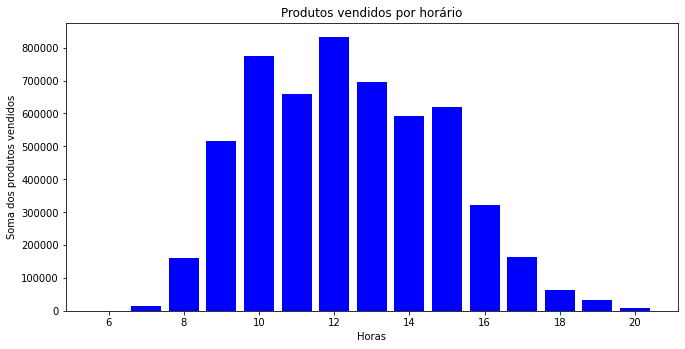

In [0]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0, 0, 1.7, 1])
    
eixo.bar(lucro_hora.index, lucro_hora['soma'], color='blue')
    
plt.xlabel('Horas')
plt.ylabel('Soma dos produtos vendidos')
plt.title('Produtos vendidos por horário')

plt.show()

In [0]:
lucro_regiao = df2[(df2['lucro'] >= 0) & (df2['region'] != 'United Kingdom') & (df2['ano'] == 2010)]\
    .groupby(by='region')\
    .agg(soma=('lucro', 'sum'))\
    .sort_values('soma', ascending=False).round(2).head(10)

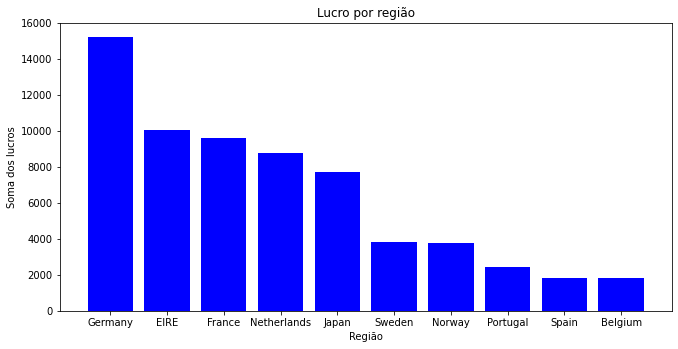

In [0]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0, 0, 1.7, 1])
    
eixo.bar(lucro_regiao.index, lucro_regiao['soma'], color='blue')
    
plt.xlabel('Região')
plt.ylabel('Soma dos lucros')
plt.title('Lucro por região')

plt.show()


<hr>

<hr>

## **Visualização de disparidade**

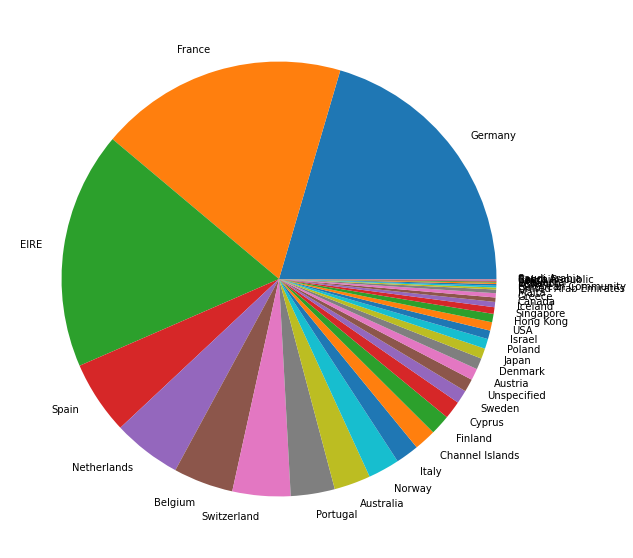

In [0]:
normalizado = df2['region'][(df2['region'] != 'United Kingdom')].value_counts(normalize=True)
fig = plt.figure(figsize=(10, 10))
plt.pie(normalizado, labels=normalizado.index)

plt.show()

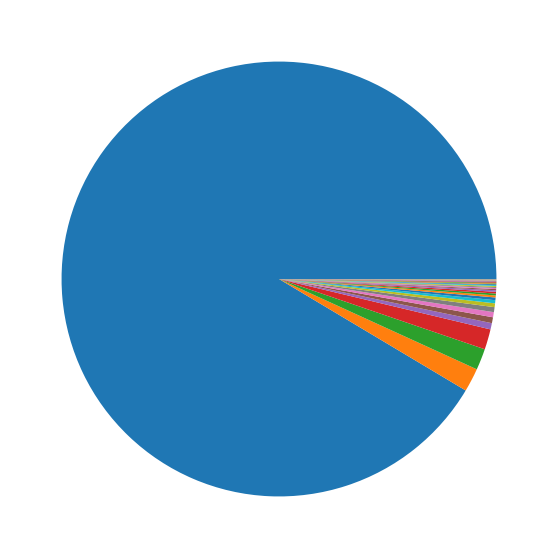

In [0]:
normalizado = df2['region'].value_counts(normalize=True)
fig = plt.figure(figsize=(10, 10))
plt.pie(normalizado)

plt.show()

<hr>